# Decision Trees and Random Forest

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('kyphosis.csv')
df.head(3)

Kyphosis  Age  Number  Start
0   absent   71       3      5
1   absent  158       3     14
2  present  128       4      5

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


**EDA**

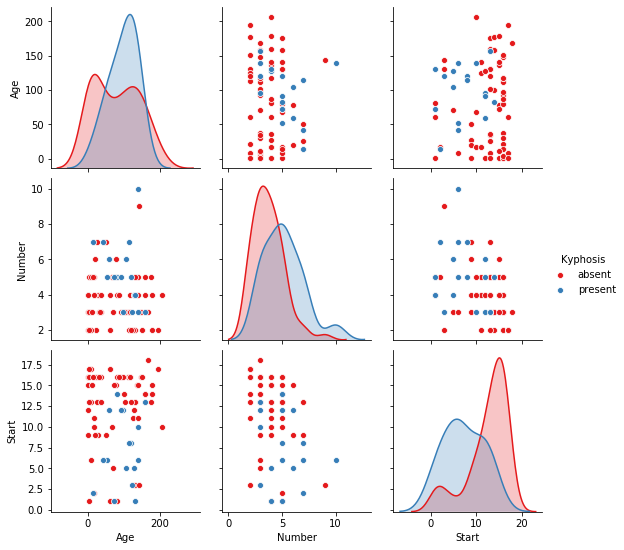

In [4]:
sns.pairplot(df, hue='Kyphosis', palette = 'Set1');

**Pre-processing**

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X = df.drop('Kyphosis', axis=1)
y = df['Kyphosis']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

**Decision Tree**

In [9]:
from sklearn.tree import DecisionTreeClassifier

In [11]:
dtree = DecisionTreeClassifier()

In [12]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [13]:
y_pred = dtree.predict(X_test)

In [14]:
from sklearn.metrics import classification_report,confusion_matrix

In [15]:
cnf_matrix = confusion_matrix(y_test, y_pred)
print(cnf_matrix)

[[16  3]
 [ 4  2]]


Text(0.5, 15.0, 'Predicted Label')

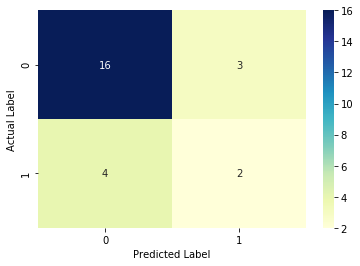

In [16]:
sns.heatmap(cnf_matrix, annot=True, cmap="YlGnBu",fmt='d')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

In [17]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      absent       0.80      0.84      0.82        19
     present       0.40      0.33      0.36         6

    accuracy                           0.72        25
   macro avg       0.60      0.59      0.59        25
weighted avg       0.70      0.72      0.71        25



In [18]:
from sklearn import tree

In [19]:
features = list(df.columns[1:])
targets = ['absent', 'present']
print(features)
print(targets)

['Age', 'Number', 'Start']
['absent', 'present']


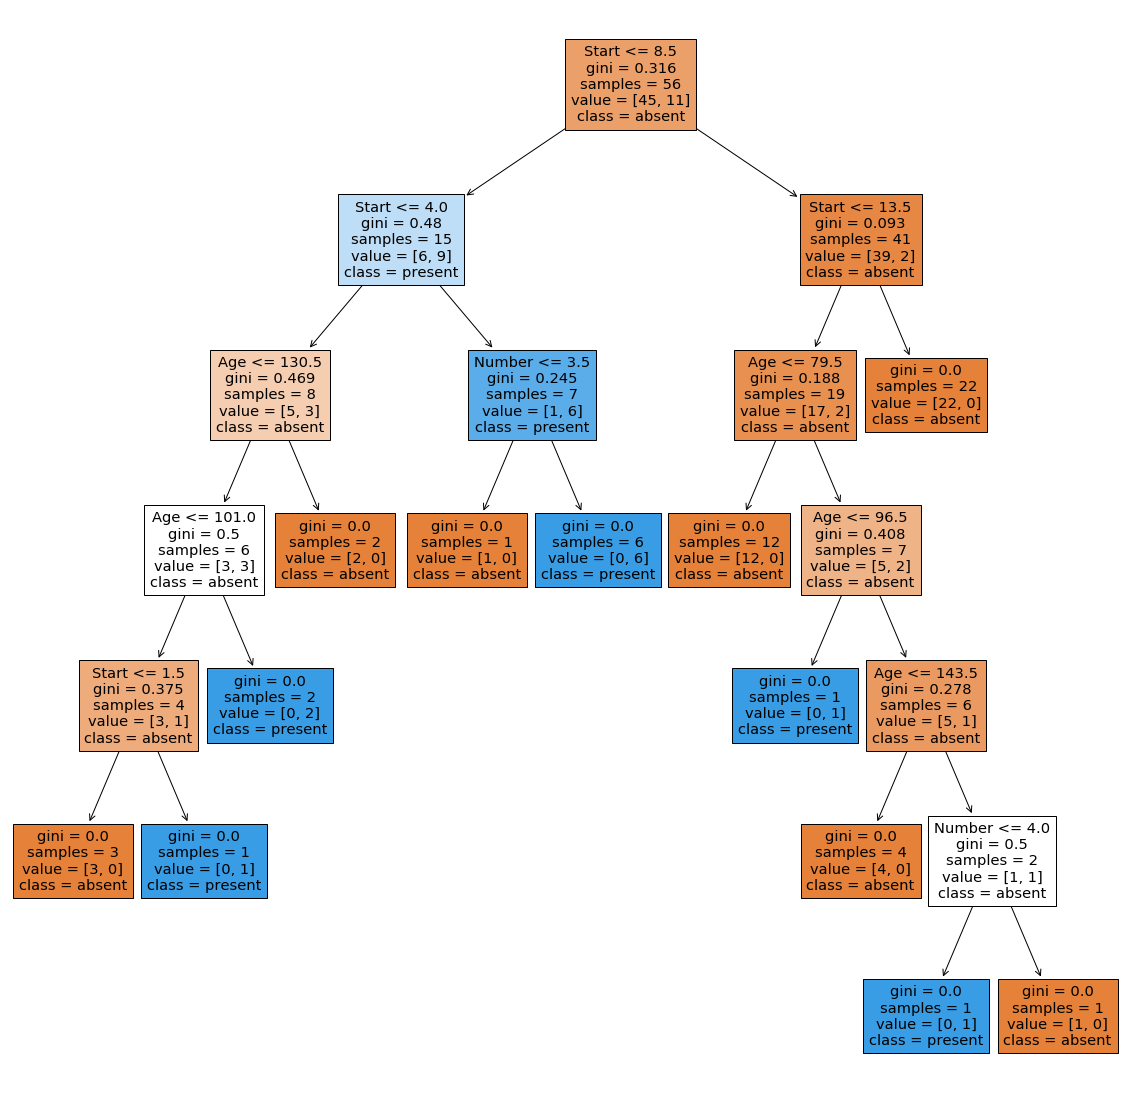

In [20]:
plt.figure(figsize=(20,20))
tree2 = tree.plot_tree(dtree,filled=True,feature_names=features ,class_names = targets)

**Random Forest**

In [21]:
from sklearn.ensemble import RandomForestClassifier

In [22]:
model = RandomForestClassifier(n_estimators = 100)
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [23]:
y_pred = model.predict(X_test)

In [24]:
y_pred

array(['absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'absent', 'absent', 'absent', 'absent', 'absent', 'present',
       'absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'absent'], dtype=object)

In [25]:
cnf_matrix = confusion_matrix(y_test, y_pred)

In [26]:
cnf_matrix

array([[19,  0],
       [ 5,  1]], dtype=int64)

Text(0.5, 15.0, 'Predicted Label')

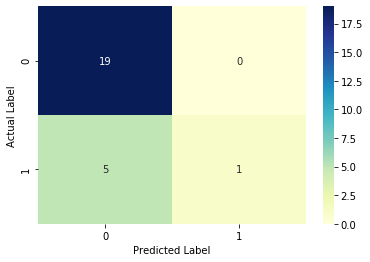

In [27]:
sns.heatmap(cnf_matrix, annot=True, cmap="YlGnBu",fmt='d')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

In [28]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      absent       0.79      1.00      0.88        19
     present       1.00      0.17      0.29         6

    accuracy                           0.80        25
   macro avg       0.90      0.58      0.58        25
weighted avg       0.84      0.80      0.74        25



In [31]:
fn=features
cn=targets
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (20, 20), dpi=800)
tree.plot_tree(model.estimators_[0],
               feature_names = fn,
               class_names=cn,
               filled = True);
fig.savefig('rf.png')